In [9]:
'''
BY: Lena Corredor March4,2018
Description: This script takes a request when a user tweets something similar to: 
            "@LenaCorredor Analyze: @CNN" and then post a tweet back 
            to the request user with a plot of sentiment analysis. It also outputs
            a log file.
Tools: Matplotlib, pandas, tweepy            
version: version 2 is posting a new tweet as opposed to replying to the old tweet.

Requirements:
1. Your bot should scan your account every __five minutes__ for 
    mentions.
2. Your bot should pull 500 most recent tweets to analyze for 
    each incoming request.
3. Your script should prevent abuse by analyzing __only__ Twitter 
    accounts that have not previously been analyzed.
4. Your plot should include meaningful legend and labels.
5. It should also mention the Twitter account name of the requesting user.
6. When submitting your assignment, be sure to have at least __three__ 
    analyses tweeted out from your account (enlist the help of classmates, 
    friends, or family, if necessary!).
7. Notable libraries used to complete this application include: 
    Matplotlib, Pandas, Tweepy, TextBlob, and Seaborn.
8. You may find it helpful to organize your code in function(s), then call them.

'''

'\nBY: Lena Corredor March4,2018\nversion: version 2 is posting a new tween as opposed to replying to the old tweet.\nDescription: This script takes a request when a user tweets something similar to: \n            "@LenaCorredor Analyze: @CNN" and then post a tweet back \n            to the request user with a plot of sentiment analysis.\nRequirements:\n1. Your bot should scan your account every __five minutes__ for \n    mentions.\n2. Your bot should pull 500 most recent tweets to analyze for \n    each incoming request.\n3. Your script should prevent abuse by analyzing __only__ Twitter \n    accounts that have not previously been analyzed.\n4. Your plot should include meaningful legend and labels.\n5. It should also mention the Twitter account name of the requesting user.\n6. When submitting your assignment, be sure to have at least __three__ \n    analyses tweeted out from your account (enlist the help of classmates, \n    friends, or family, if necessary!).\n7. Notable libraries us

In [10]:
#Scan account every 5 minutes for mentions.
#Store the first three mentions and the time that are not duplicated.
#Store the list in a file so that it doesn't have to be analyze again.

# 1. Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from pprint import pprint 
import time

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from twitenv import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [11]:
target_terms=[]

In [12]:
# 2. Scan tweets for top 3 requests 
def tweet_out():
    target_term = "@LenaCorredor Analyze:"

    # Grab most rencent tweets
    try:
        public_tweets = api.search(target_term, count=20, result_type="recent")
        tweet_user=public_tweets["statuses"][0]["user"]["screen_name"]
        tweet_name=public_tweets["statuses"][0]["user"]["name"]   
        #list of target terms to analyze. There can be 2 mentions in a tweet. E.g. @CNN @BBC
        pprint(tweet_user)
        pprint(tweet_name)
        user_mentions=public_tweets["statuses"][0]["entities"]['user_mentions']
        target_user=user_mentions[1]['screen_name']

        if target_user in target_terms:
            pass
        else:
            target_terms.append(target_user)
            # 3. Get results for top 500 tweets
            sentiments = []
            oldest_tweet = None
            counter = 1
            public_tweets = api.user_timeline(target_user, 
                                              count=500,
                                             max_id=oldest_tweet)

            # Loop through all tweets
            for tweet in public_tweets:

                # Run Vader Analysis on each tweet
                results = analyzer.polarity_scores(tweet["text"])

                # Add each value to the appropriate array
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]
                tweets_ago = counter

                # Add sentiments for each tweet into an array
                sentiments.append({"Date": tweet["created_at"], 
                                   "Compound": compound,
                                   "Positive": pos,
                                   "Negative": neu,
                                   "Neutral": neg,
                                   "Tweets Ago": counter})


                counter = counter + 1
            oldest_tweet = int(tweet['id_str']) - 1

            #Create plots for each sentiment analysis.
            #Make plots look nice, and save it in the folder

            sentiments_pd = pd.DataFrame.from_dict(sentiments)
        #     sentiments_pd.head()

            #Create plot
            plt.plot(np.arange(len(sentiments_pd["Compound"])),
                     sentiments_pd["Compound"], marker="o", linewidth=0.5,
                     alpha=0.8)

            #Incorporate the other graph properties
            now = datetime.now()
            now = now.strftime("%Y-%m-%d %H:%M")
            plt.title("Sentiment Analysis ({}) for {}".format(now, target_user))
            plt.ylabel("Positive/Negative of Tweets")
            plt.xlabel("Tweets Ago")
            plt.savefig("plot.png")
        #     plt.show()
            api.update_with_media("plot.png",
                              f"@{tweet_user} Sentiment plot for @{target_user}")
    except Exception as e:
            print(e)


'dollyyeah'
'Dolly Ye'
I'm here0


KeyboardInterrupt: 

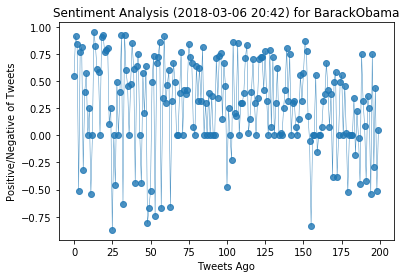

In [13]:
interval = 30  # seconds
for i in range(12):
    tweet_out()
    print("I'm here"+str(i))
    time.sleep(interval)